<a href="https://colab.research.google.com/github/souravs17031999/Zoo-Animal-Classification/blob/master/Zoo_animal_clasification_project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zoo Animal Classification Problem

# Problem statement : 
This dataset consists of 101 animals from a zoo. There are 16 variables with various traits to describe the animals. The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.

## Import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.tree import export_graphviz
import pydotplus

## Import dataset

In [2]:
df = pd.read_csv("zoo.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df_temp = pd.read_csv('class.csv')
df_temp.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [4]:
df.shape

(101, 18)

# Data preprocessing
## Following steps will be followed :

* firstly check for all NaN/ Null values and replacing it appropriately
* Then i will go for converting categorical variables to numerical values by substituting dummy variables
* Then i will drop irrelevant columns 
* Then finally all datatypes will be changed to int/float     
and other measures like normalizing values if necessary.

### checking for Null values

In [5]:
print(pd.isnull(df).sum())

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64


### checking for unqiue values

In [6]:
for i in df:
  print(df[i].value_counts())

frog        2
seal        1
sole        1
honeybee    1
vampire     1
           ..
bear        1
crayfish    1
dolphin     1
lobster     1
gnat        1
Name: animal_name, Length: 100, dtype: int64
0    58
1    43
Name: hair, dtype: int64
0    81
1    20
Name: feathers, dtype: int64
1    59
0    42
Name: eggs, dtype: int64
0    60
1    41
Name: milk, dtype: int64
0    77
1    24
Name: airborne, dtype: int64
0    65
1    36
Name: aquatic, dtype: int64
1    56
0    45
Name: predator, dtype: int64
1    61
0    40
Name: toothed, dtype: int64
1    83
0    18
Name: backbone, dtype: int64
1    80
0    21
Name: breathes, dtype: int64
0    93
1     8
Name: venomous, dtype: int64
0    84
1    17
Name: fins, dtype: int64
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
1    75
0    26
Name: tail, dtype: int64
0    88
1    13
Name: domestic, dtype: int64
0    57
1    44
Name: catsize, dtype: int64
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dt

### Other stats measures

In [7]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


### checking for data types 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [0]:
# so we need to remove animal_name as it is not very much useful for our purposes.
fields_to_drop = ['animal_name']
df.drop(fields_to_drop, axis=1, inplace = True)

In [10]:
print(df.head())
print(df.shape)

   hair  feathers  eggs  milk  ...  tail  domestic  catsize  class_type
0     1         0     0     1  ...     0         0        1           1
1     1         0     0     1  ...     1         0        1           1
2     0         0     1     0  ...     1         0        0           4
3     1         0     0     1  ...     0         0        1           1
4     1         0     0     1  ...     1         0        1           1

[5 rows x 17 columns]
(101, 17)


## Data visualization and finding patterns/correlations

## First of all , let's investigate balancing of dataset samples

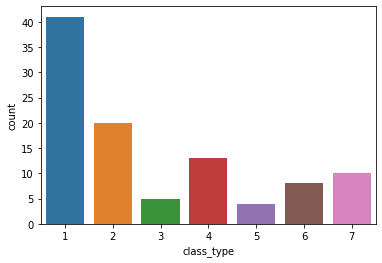

In [11]:
sns.countplot(df['class_type'])

In [12]:
df.columns[:16]

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

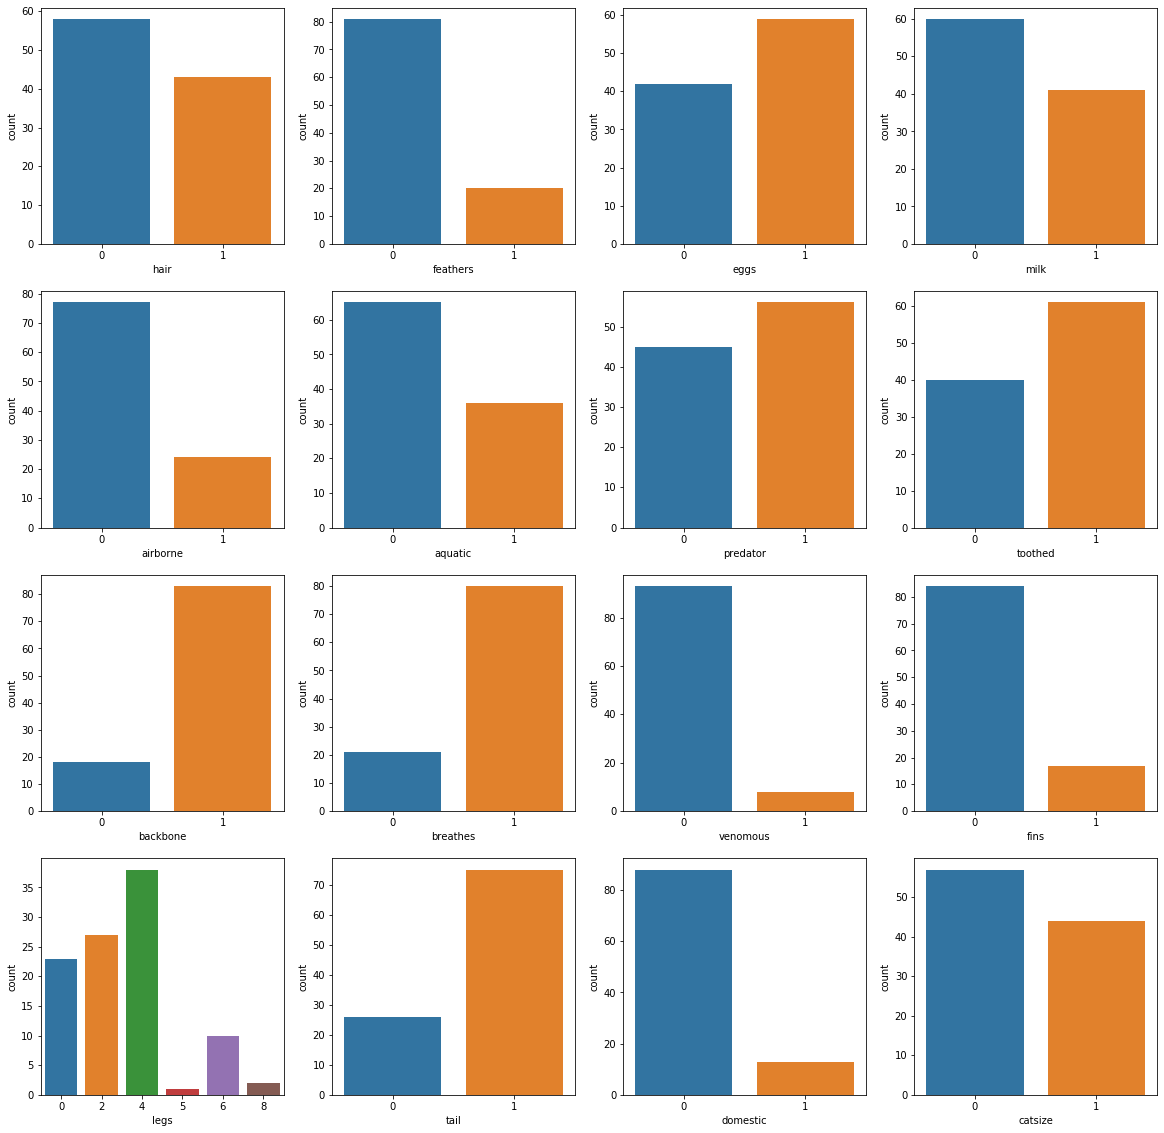

In [13]:
# investigate counts of unique values for each columns in dataframe
fig, ax =plt.subplots(4,4, figsize=(20, 20))
k = 0
for i in range(0, 4):
  for j in range(0, 4):
    sns.countplot(df[df.columns[k]], ax = ax[i][j])
    k += 1
fig.show()

## investigating the distribution of data 

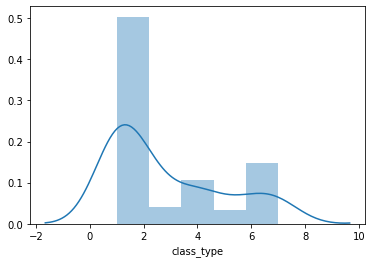

In [14]:
sns.distplot(df['class_type'])

## analyzing heatmaps !

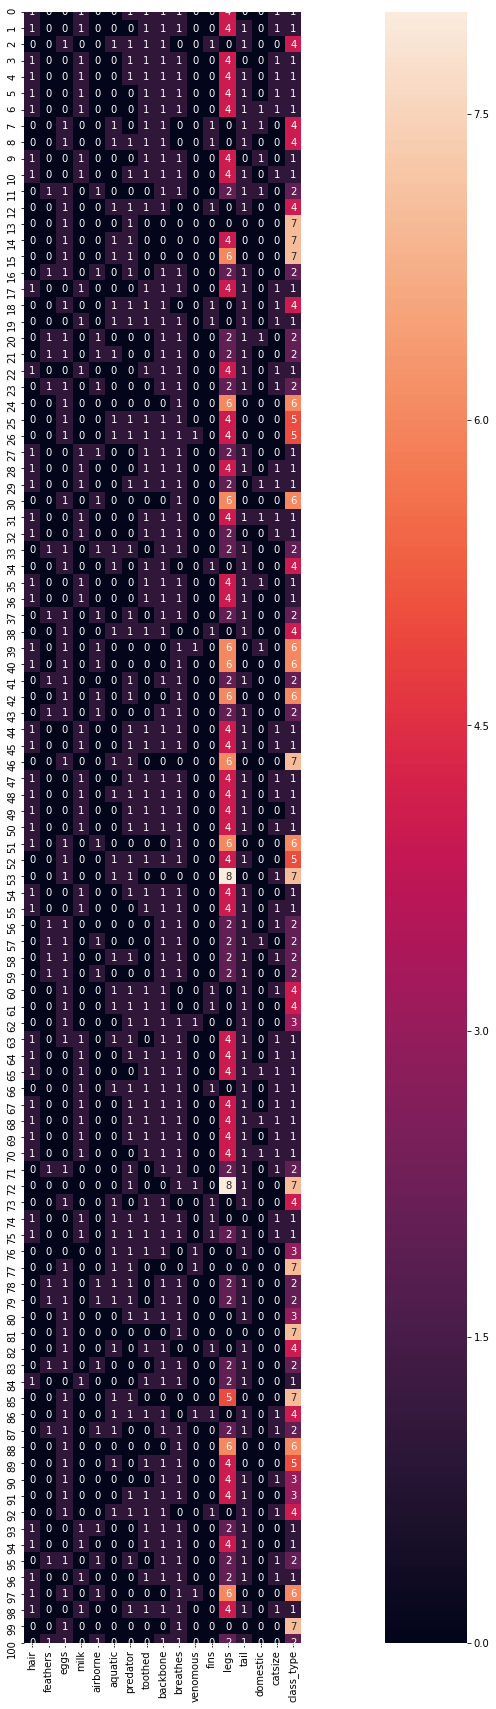

In [15]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df, square = True, annot = True)

## Splitting dataset into train and testing 

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [0]:
def split(X, y):
   return train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train, X_test, y_train, y_test = split(X, y)

In [0]:
def train_and_test(X_train, X_test, y_train, y_test):
  
  classifier1 = DecisionTreeClassifier(criterion='gini')
  classifier1.fit(X_train, y_train)
  print('Decision tree classifier : ', end = " ")
  print(accuracy_score(y_test, classifier1.predict(X_test)))
  cf1 = confusion_matrix(y_test,classifier1.predict(X_test))
  

  classifier2 = RandomForestClassifier()
  classifier2.fit(X_train, y_train)
  print('Random forest classifier : ', end = " ")
  print(accuracy_score(y_test, classifier2.predict(X_test)))
  cf2 = confusion_matrix(y_test,classifier2.predict(X_test))
  
  classifier3 = GaussianNB()
  classifier3.fit(X_train, y_train)
  print('Naive bayes classifier : ', end = " ")
  print(accuracy_score(y_test, classifier3.predict(X_test)))
  cf3 = confusion_matrix(y_test,classifier3.predict(X_test))

  classifier4 = SVC()
  classifier4.fit(X_train, y_train)
  print('SVM classifier : ', end = " ")
  print(accuracy_score(y_test, classifier4.predict(X_test)))
  cf4 = confusion_matrix(y_test,classifier4.predict(X_test))

  classifier5 = KNeighborsClassifier()
  classifier5.fit(X_train, y_train)
  print('KNN classifier : ', end = " ")
  print(accuracy_score(y_test, classifier5.predict(X_test)))
  cf5 = confusion_matrix(y_test,classifier5.predict(X_test))

  print()
  return cf1, cf2, cf3, cf4, cf5, classifier1, classifier2

In [62]:
cf1, cf2, cf3, cf4, cf5, classifier1, classifier2 = train_and_test(X_train, X_test, y_train, y_test)

Decision tree classifier :  1.0
Random forest classifier :  1.0
Naive bayes classifier :  1.0
SVM classifier :  1.0
KNN classifier :  1.0



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix


Text(0.5, 32.0, 'Confusion matrix for decision trees')

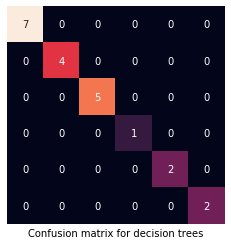

In [63]:
print('Confusion matrix')
sns.heatmap(cf1, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for decision trees')

Text(0.5, 32.0, 'Confusion matrix for random trees')

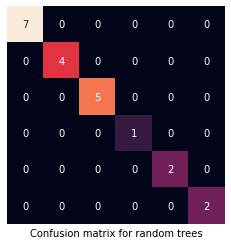

In [64]:
sns.heatmap(cf2, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for random trees')


Text(0.5, 32.0, 'Confusion matrix for Naive bayes classifier')

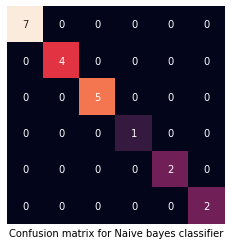

In [65]:
sns.heatmap(cf3, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for Naive bayes classifier')

Text(0.5, 32.0, 'Confusion matrix for SVM classifier')

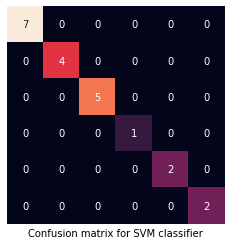

In [66]:
sns.heatmap(cf4, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for SVM classifier')

Text(0.5, 32.0, 'Confusion matrix for KNN classifier')

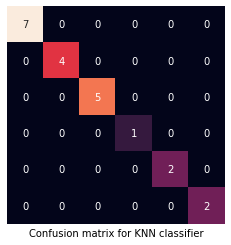

In [67]:
sns.heatmap(cf5, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for KNN classifier')

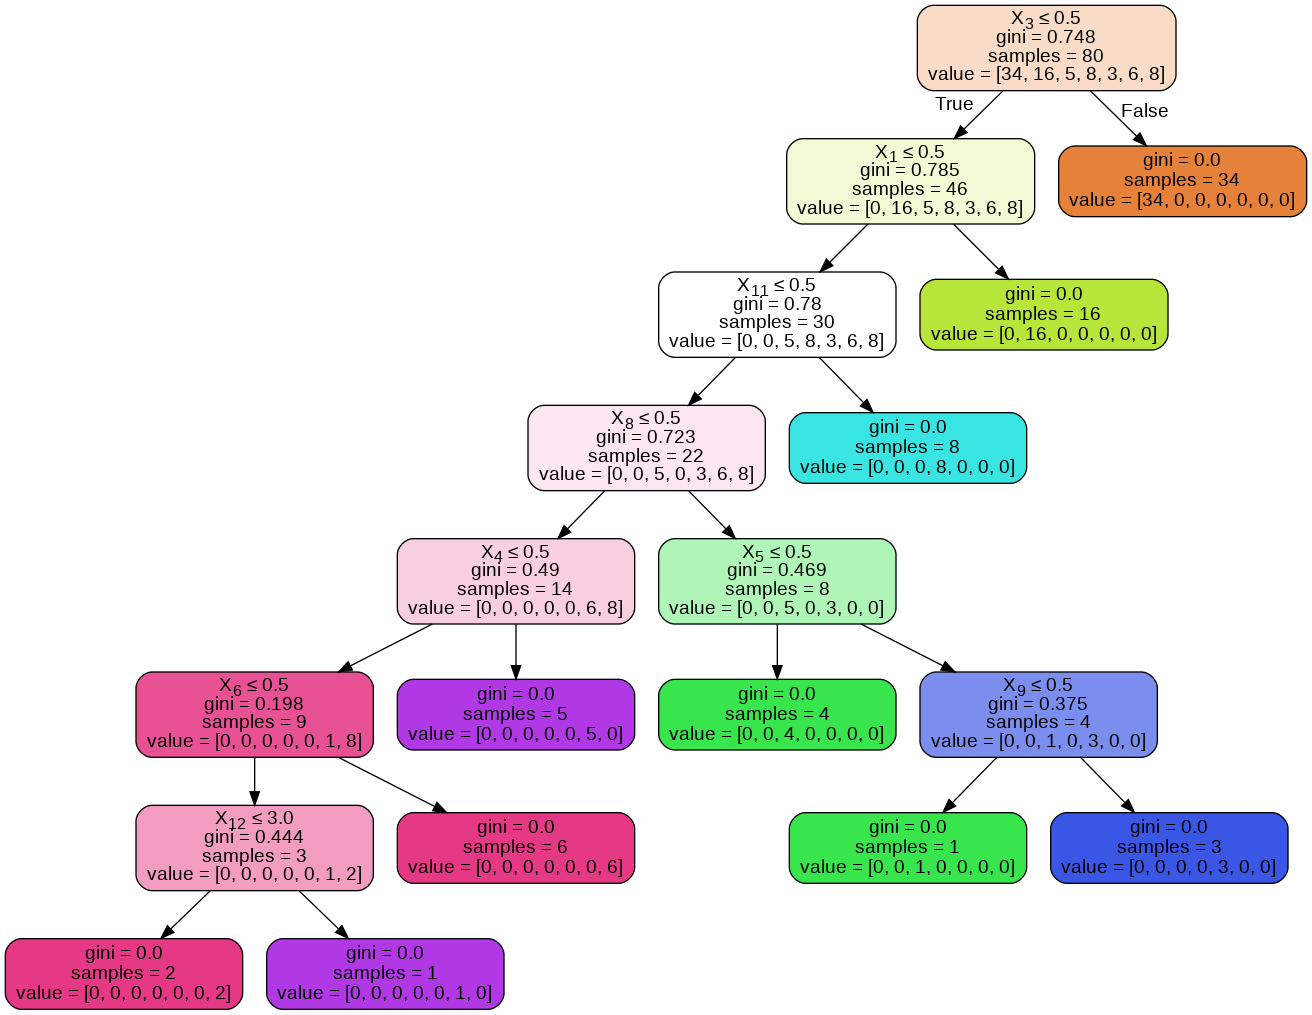

In [68]:
from IPython.display import Image  
import graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image 

dot_data = StringIO()
export_graphviz(classifier1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
